# Notebook 03: Exploratory Data Analysis (EDA)

1. Load data from S3 into a SageMaker notebook
2. Analyze data structure and quality 
3. Analyze the target variable (NFCI) distribution
4. Check for missing values and data quality issues
5. Explore relationships between features

### load data

In [2]:
import os
import sys
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:


# # Set display options
# pd.set_option('display.max_columns', 50)
# pd.set_option('display.float_format', '{:.4f}'.format)
# sns.set_style("whitegrid")

# Add project root to path
sys.path.append("..")

from config.config import (
    BUCKET_NAME,
    AWS_REGION,
    S3_PREFIX,
    RAW_DATA_FILENAME,
    get_s3_uri,
    TARGET_COLUMN,
)

In [4]:
# Load data from S3 (Parquet)
parquet_path = f"s3://{BUCKET_NAME}/data/raw_parquet/{RAW_DATA_FILENAME.replace('.csv', '.parquet')}"
print(f"Loading from: {parquet_path}")

df = pd.read_parquet(parquet_path)

# Convert date from nanoseconds to datetime
df["date"] = pd.to_datetime(df["date"])

print(f"\nShape: {df.shape}")
print(f"Date range: {df['date'].min()} to {df['date'].max()}")

Loading from: s3://nfci-forecasting-306617143793/data/raw_parquet/state_month_full.parquet

Shape: (12000, 42)
Date range: 2005-01-01 00:00:00 to 2024-12-01 00:00:00


In [6]:
df.head()

,state_fips,date,UNRATE,PAYEMS,CIVPART,EMRATIO,U6RATE,AWHMAN,AHETPI,CPIAUCSL,...,WALCL,SPREAD_10Y_2Y,SPREAD_10Y_3M,CPI_YOY,state_name,B19013_001E,B01003_001E,B25077_001E,B25064_001E,B17001_002E
0,1,2005-01-01,5.3,132781,65.8,62.4,9.2,40.7,15.90,191.6,...,807262.0,0.85,1.63,NaN,None,42081.0,4712651.0,117600.0,644.0,786544.0
1,1,2005-02-01,5.4,133033,65.9,62.4,9.2,40.7,15.93,192.4,...,804576.0,0.77,1.60,NaN,None,42081.0,4712651.0,117600.0,644.0,786544.0
2,1,2005-03-01,5.2,133152,65.9,62.4,9.1,40.4,15.97,193.1,...,807551.0,0.70,1.71,NaN,None,42081.0,4712651.0,117600.0,644.0,786544.0
3,1,2005-04-01,5.2,133519,66.1,62.7,9.0,40.4,16.01,193.7,...,809797.0,0.55,1.31,NaN,None,42081.0,4712651.0,117600.0,644.0,786544.0
4,1,2005-05-01,5.1,133689,66.1,62.8,8.9,40.4,16.03,193.6,...,810160.0,0.40,1.01,NaN,None,42081.0,4712651.0,117600.0,644.0,786544.0


In [7]:
## data types summary
print(df.dtypes.value_counts())

float64           38
int64              2
datetime64[ns]     1
object             1
Name: count, dtype: int64


In [8]:
# Statistical summary
df.describe()

,state_fips,date,UNRATE,PAYEMS,CIVPART,EMRATIO,U6RATE,AWHMAN,AHETPI,CPIAUCSL,...,M2SL,WALCL,SPREAD_10Y_2Y,SPREAD_10Y_3M,CPI_YOY,B19013_001E,B01003_001E,B25077_001E,B25064_001E,B17001_002E
count,12000.000000,12000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,...,12000.000000,1.200000e+04,12000.000000,12000.000000,11400.000000,12000.00000,1.200000e+04,12000.000000,12000.000000,1.200000e+04
mean,29.320000,2014-12-16 05:00:00,5.817500,141799.866667,63.672917,59.960833,10.665417,41.275833,21.695375,242.298571,...,12812.316667,4.104151e+06,0.988208,1.247583,0.025454,58796.30300,6.308309e+06,220538.000000,929.378000,8.554136e+05
min,1.000000,2005-01-01 00:00:00,3.400000,129705.000000,60.100000,51.200000,6.600000,38.400000,15.900000,191.600000,...,6430.800000,8.045760e+05,-1.060000,-1.880000,-0.019588,37881.00000,5.455790e+05,94500.000000,549.000000,5.229700e+04
25%,17.000000,2009-12-24 06:00:00,4.100000,134961.000000,62.700000,58.700000,7.900000,40.900000,18.870000,217.390500,...,8515.800000,2.245029e+06,0.180000,0.275000,0.014147,48866.25000,1.824806e+06,143375.000000,738.750000,2.283470e+05
50%,29.500000,2014-12-16 12:00:00,5.000000,139416.000000,63.000000,59.900000,9.200000,41.400000,20.785000,237.116000,...,11744.400000,4.086403e+06,0.945000,1.435000,0.021513,56401.50000,4.444628e+06,194100.000000,878.000000,5.866470e+05
75%,42.000000,2019-12-08 18:00:00,7.350000,148794.750000,64.925000,60.600000,13.650000,41.800000,23.857500,257.070250,...,15364.775000,4.495706e+06,1.710000,2.132500,0.033700,66897.00000,7.172728e+06,261950.000000,1056.000000,9.164920e+05
max,56.000000,2024-12-01 00:00:00,14.800000,158942.000000,66.400000,63.400000,22.900000,42.400000,30.670000,317.603000,...,21750.000000,8.939199e+06,2.840000,3.790000,0.089993,101652.00000,3.945535e+07,808200.000000,1956.000000,6.135142e+06
std,15.624274,NaN,2.135765,8300.156261,1.495464,1.811994,3.493570,0.647972,3.918467,32.251286,...,4974.506834,2.492312e+06,0.964133,1.293903,0.019675,13010.06293,6.987937e+06,104507.183686,251.593915,1.000132e+06


In [9]:
# Column names grouped by type
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
datetime_cols = df.select_dtypes(include=['datetime64']).columns.tolist()

print(f"Numeric columns ({len(numeric_cols)}): {numeric_cols[:10]}...")
print(f"Categorical columns ({len(categorical_cols)}): {categorical_cols}")
print(f"Datetime columns ({len(datetime_cols)}): {datetime_cols}")

Numeric columns (40): ['state_fips', 'UNRATE', 'PAYEMS', 'CIVPART', 'EMRATIO', 'U6RATE', 'AWHMAN', 'AHETPI', 'CPIAUCSL', 'CPILFESL']...
Categorical columns (1): ['state_name']
Datetime columns (1): ['date']


### check for missing values

In [10]:
# Missing values summary
missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(2)

missing_df = pd.DataFrame({
    'missing_count': missing,
    'missing_pct': missing_pct
}).sort_values('missing_pct', ascending=False)

# Show only columns with missing values
missing_df[missing_df['missing_count'] > 0]

,missing_count,missing_pct
MSPUS,8000,66.67
state_name,3000,25.00
PPIFDG,2900,24.17
CPI_YOY,600,5.00


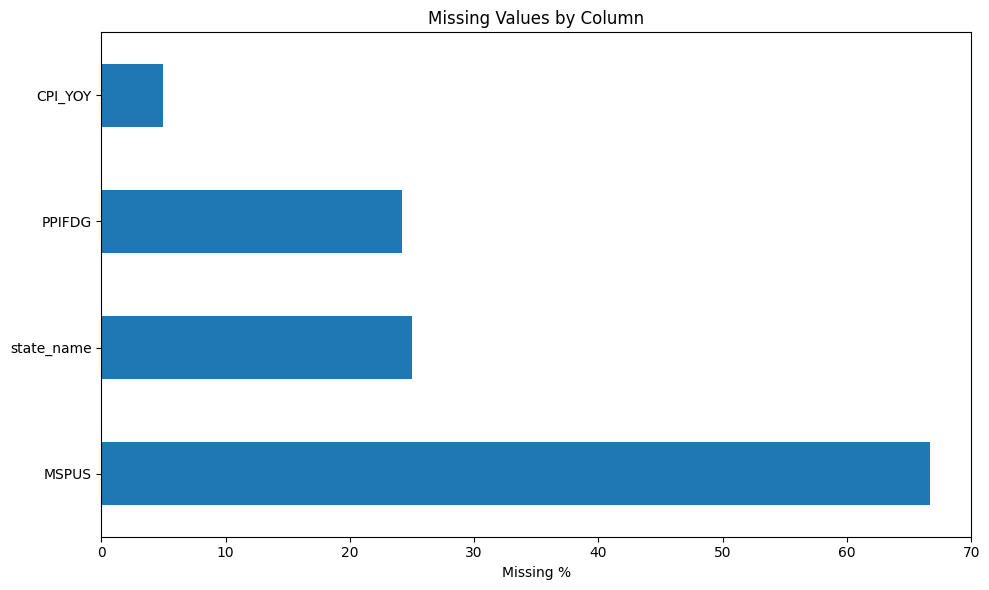

In [11]:
# Visualize missing values
if missing_df['missing_count'].sum() > 0:
    fig, ax = plt.subplots(figsize=(10, 6))
    missing_cols = missing_df[missing_df['missing_count'] > 0]
    if len(missing_cols) > 0:
        missing_cols['missing_pct'].plot(kind='barh', ax=ax)
        ax.set_xlabel('Missing %')
        ax.set_title('Missing Values by Column')
        plt.tight_layout()
        plt.show()
else:
    print("No missing values found!")

### Target variable analysis

In [15]:
# Target variable stats
target = "NFCI"  # Column names are lowercase in Parquet
print(f"Target: {target}")
print(df[target].describe())

Target: NFCI
count    12000.000000
mean        -0.314814
std          0.581069
min         -0.794750
25%         -0.602553
50%         -0.503250
75%         -0.285017
max          3.053370
Name: NFCI, dtype: float64


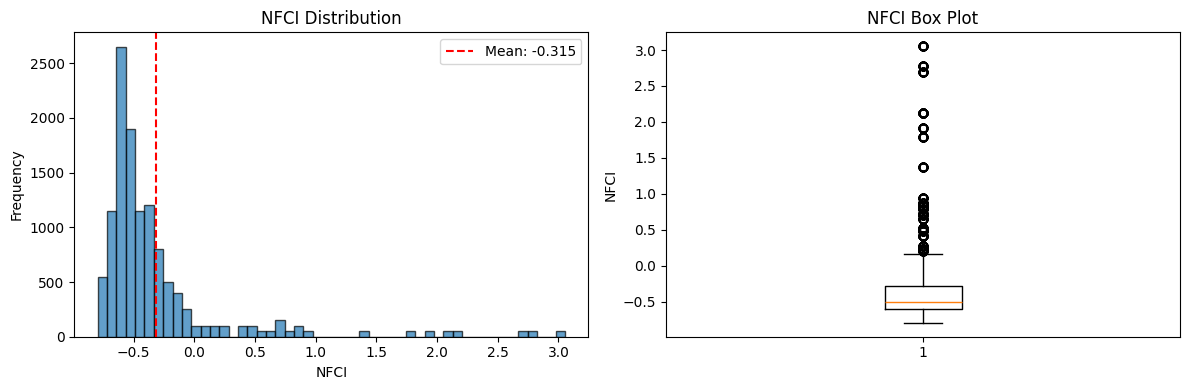

In [16]:
# NFCI distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Histogram
axes[0].hist(df[target].dropna(), bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('NFCI')
axes[0].set_ylabel('Frequency')
axes[0].set_title('NFCI Distribution')
axes[0].axvline(df[target].mean(), color='red', linestyle='--', label=f'Mean: {df[target].mean():.3f}')
axes[0].legend()

# Box plot
axes[1].boxplot(df[target].dropna())
axes[1].set_ylabel('NFCI')
axes[1].set_title('NFCI Box Plot')

plt.tight_layout()
plt.show()

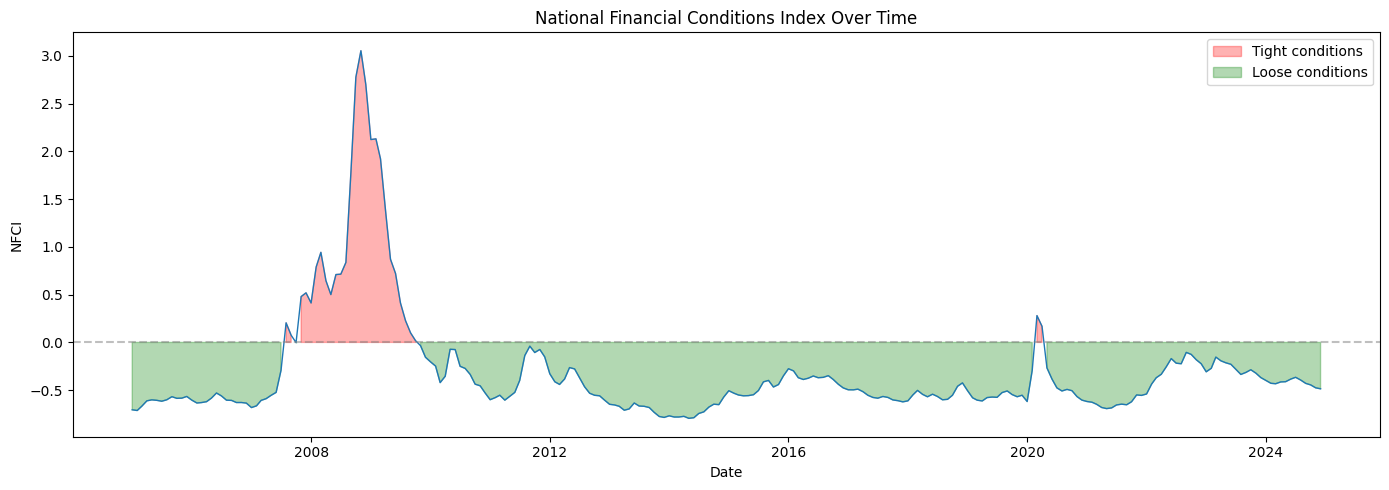

In [17]:
# NFCI over time (national average since NFCI is same across states)
nfci_time = df.groupby('date')[target].mean().reset_index()

fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(nfci_time['date'], nfci_time[target], linewidth=1)
ax.axhline(0, color='gray', linestyle='--', alpha=0.5)
ax.set_xlabel('Date')
ax.set_ylabel('NFCI')
ax.set_title('National Financial Conditions Index Over Time')

# Highlight stress periods (NFCI > 0 indicates tighter than average conditions)
ax.fill_between(nfci_time['date'], nfci_time[target], 0, 
                where=(nfci_time[target] > 0), alpha=0.3, color='red', label='Tight conditions')
ax.fill_between(nfci_time['date'], nfci_time[target], 0, 
                where=(nfci_time[target] <= 0), alpha=0.3, color='green', label='Loose conditions')
ax.legend()
plt.tight_layout()
plt.show()

### Feature Categories Analysis

In [18]:
# Define feature groups (lowercase for Parquet)
feature_groups = {
    'Labor Market': ['unrate', 'payems', 'civpart', 'emratio', 'u6rate', 'awhman', 'ahetpi'],
    'Inflation': ['cpiaucsl', 'cpilfesl', 'pcepi', 'pcepilfe', 'ppifdg', 'cpi_yoy'],
    'Output/Demand': ['indpro', 'rrsfs', 'dgorder', 'umcsent'],
    'Housing': ['houst', 'permit', 'csushpinsa', 'mspus'],
    'Rates': ['fedfunds', 'dgs3mo', 'dgs2', 'dgs10', 'mortgage30us'],
    'Credit/Risk': ['baa', 'aaa', 'bamlh0a0hym2'],
    'Money Supply': ['m2sl', 'walcl'],
    'Spreads': ['spread_10y_2y', 'spread_10y_3m'],
    'Demographics': ['b19013_001e', 'b01003_001e', 'b25077_001e', 'b25064_001e', 'b17001_002e']
}

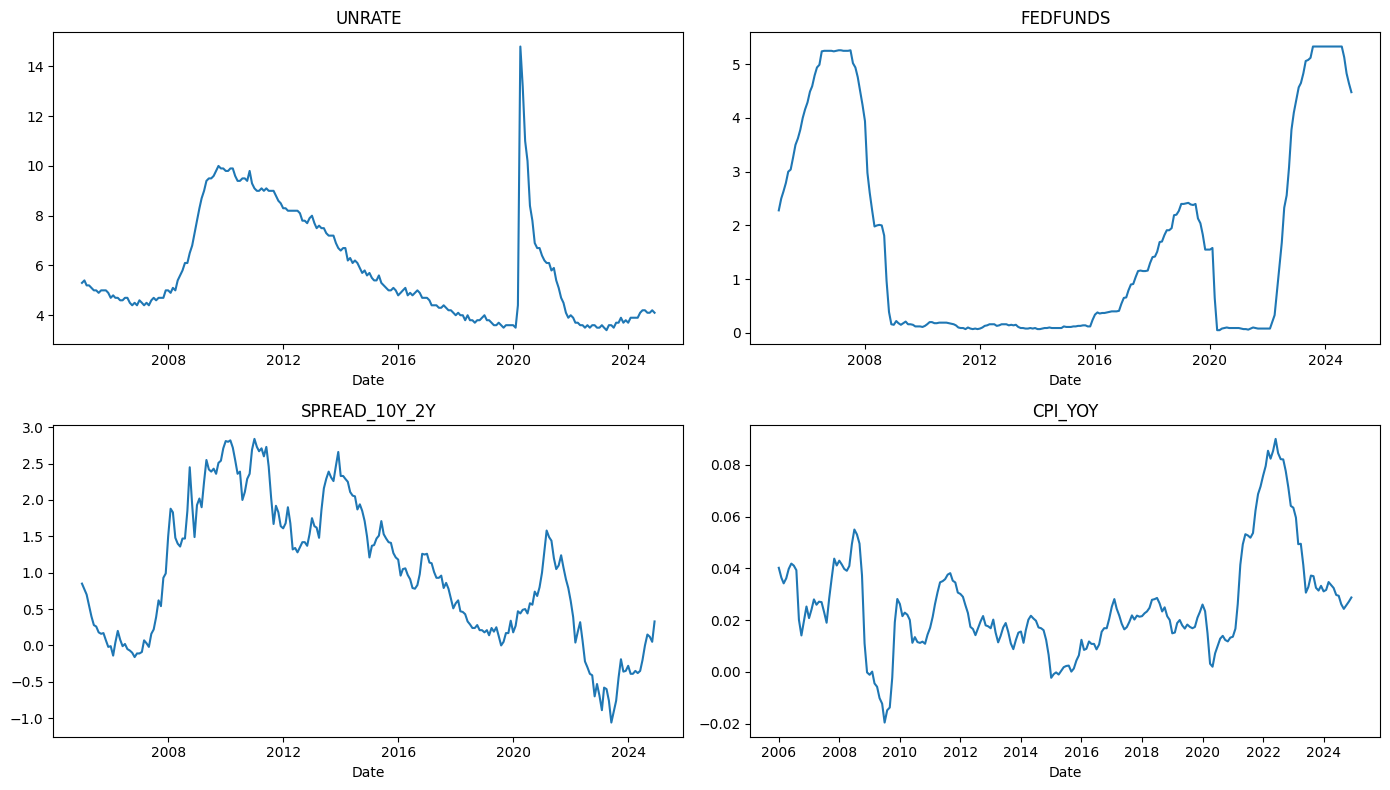

In [20]:
# Plot key features over time
key_features = ['UNRATE', 'FEDFUNDS', 'SPREAD_10Y_2Y', 'CPI_YOY']

fig, axes = plt.subplots(2, 2, figsize=(14, 8))
axes = axes.flatten()

for i, feat in enumerate(key_features):
    if feat in df.columns:
        feat_time = df.groupby('date')[feat].mean().reset_index()
        axes[i].plot(feat_time['date'], feat_time[feat])
        axes[i].set_title(feat.upper())
        axes[i].set_xlabel('Date')

plt.tight_layout()
plt.show()

### Feature Correlation Analysis

In [21]:
# Correlation with target
numeric_df = df.select_dtypes(include=[np.number])
correlations = numeric_df.corr()[target].drop(target).sort_values(ascending=False)

print(f"Top 10 positive correlations with {target.upper()}:")
print(correlations.head(10))
print(f"\nTop 10 negative correlations with {target.upper()}:")
print(correlations.tail(10))

Top 10 positive correlations with NFCI:
BAMLH0A0HYM2     0.899821
BAA              0.642402
CIVPART          0.381023
AAA              0.374392
MORTGAGE30US     0.251508
SPREAD_10Y_3M    0.237980
SPREAD_10Y_2Y    0.205631
UNRATE           0.203522
U6RATE           0.197708
PPIFDG           0.184996
Name: NFCI, dtype: float64

Top 10 negative correlations with NFCI:
M2SL      -0.204851
WALCL     -0.212383
MSPUS     -0.248035
RRSFS     -0.318672
DGORDER   -0.344274
HOUST     -0.380597
PERMIT    -0.401669
INDPRO    -0.433146
UMCSENT   -0.492832
AWHMAN    -0.536433
Name: NFCI, dtype: float64


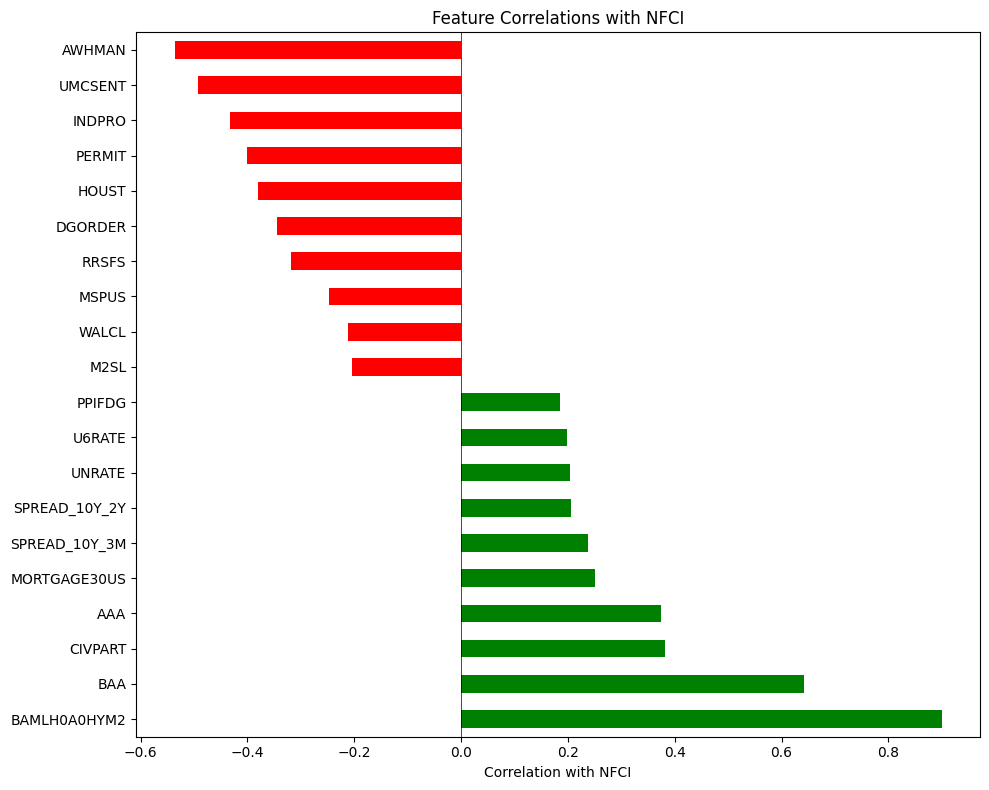

In [22]:
# Visualize correlations with target
fig, ax = plt.subplots(figsize=(10, 8))

# Top and bottom correlations
top_corr = pd.concat([correlations.head(10), correlations.tail(10)])
colors = ['green' if x > 0 else 'red' for x in top_corr.values]

top_corr.plot(kind='barh', ax=ax, color=colors)
ax.set_xlabel('Correlation with NFCI')
ax.set_title('Feature Correlations with NFCI')
ax.axvline(0, color='black', linewidth=0.5)
plt.tight_layout()
plt.show()

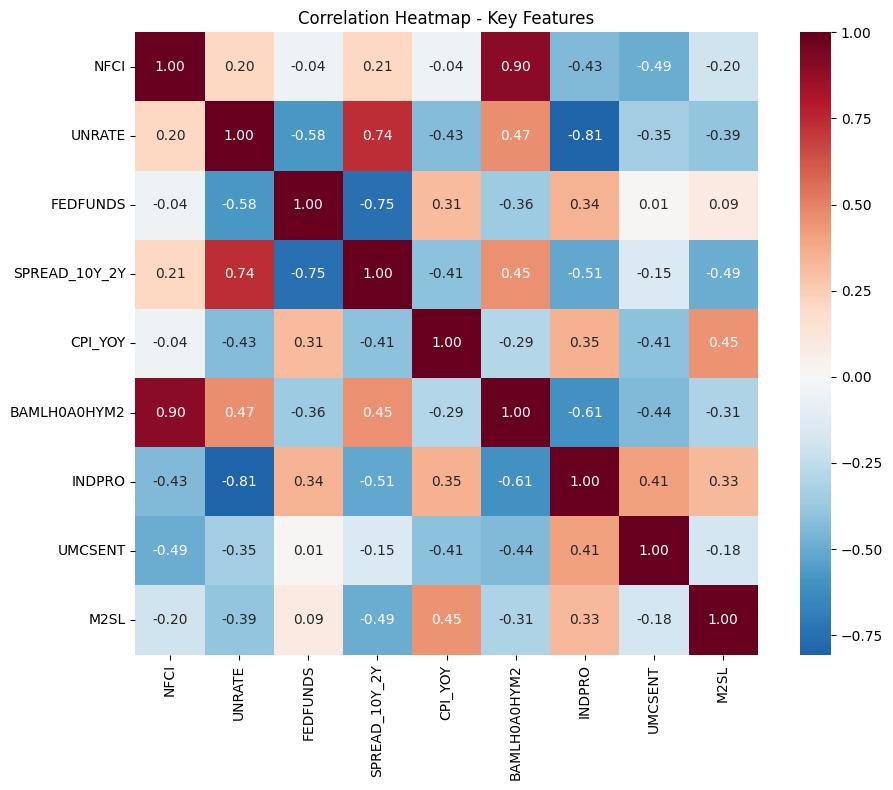

In [23]:
# Correlation heatmap for key features
key_cols = ['NFCI', 'UNRATE', 'FEDFUNDS', 'SPREAD_10Y_2Y', 'CPI_YOY', 
            'BAMLH0A0HYM2', 'INDPRO', 'UMCSENT', 'M2SL']
key_cols = [c for c in key_cols if c in df.columns]

fig, ax = plt.subplots(figsize=(10, 8))
corr_matrix = df[key_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', center=0, 
            fmt='.2f', ax=ax, square=True)
ax.set_title('Correlation Heatmap - Key Features')
plt.tight_layout()
plt.show()